In [73]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
# Importing dataset
dataset = pd.read_csv('kc_house_data.csv')
dataset.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [235]:
# Check datframe has null values
dataset.isnull().values.any()


False

In [236]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [237]:
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [238]:
#Correlation of price with all columns
price_corr = dataset[dataset.columns[1:]].corr()['price']
price_corr.sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

In [239]:
#Dropping id and date
dataset = dataset.drop(['id', 'date'], axis=1)

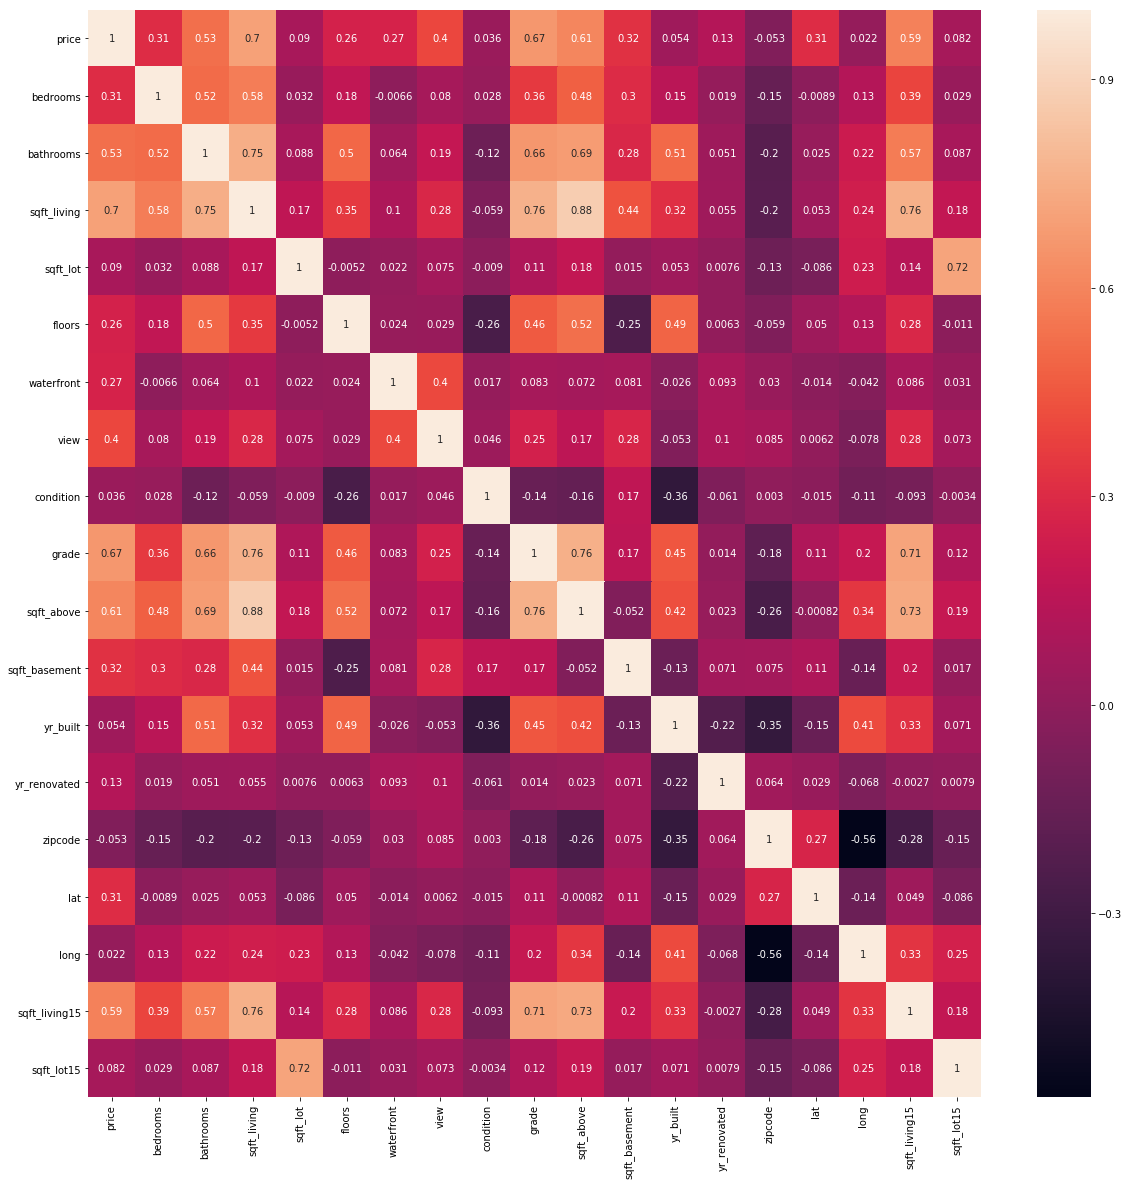

In [67]:
#Plotting correlation matrix
fig, ax = plt.subplots(figsize=(20,20))         
sns.heatmap(dataset.corr(), annot = True)

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


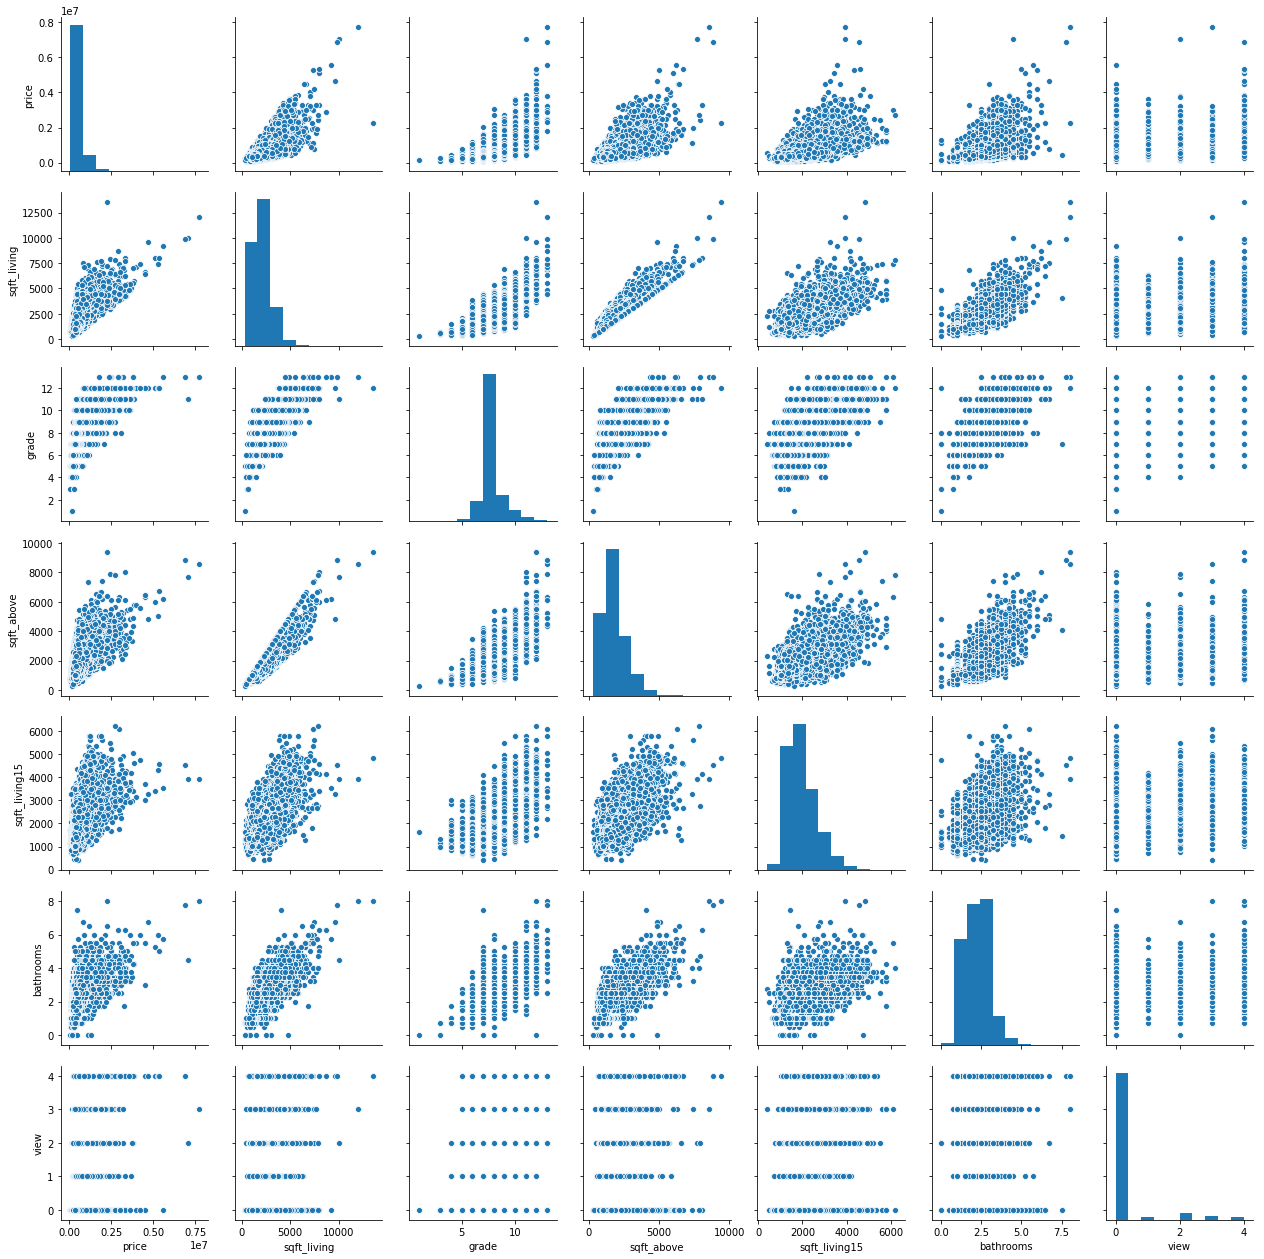

In [68]:
#understanding the distribution with seaborn
sns.pairplot(dataset[['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 
                      'bathrooms', 'view']], size=2.5)
plt.show()

In [240]:
# Create method for backward elimination, for choosing perfect model
def backwardElimination(x_opt, y_train, sl) :
    regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()
    # If max pvalue is greater than significance level of 5%
    if(max(regressor_OLS.pvalues) > sl):
        index = np.argmax(regressor_OLS.pvalues)
        x_opt = np.delete(x_opt, [index], axis=1)
        x_opt = backwardElimination(x_opt, y_train, sl)
        
    #print(regressor_OLS.summary())    
    return x_opt

In [241]:
#x_val = dataset.loc[:, dataset.columns != 'price']
#x_val

In [242]:
#dataset.iloc[: , 0]

In [243]:
# Creating a matrix of features for independent variable, and vector of dependent variable
# Indexes in python start with zero
# Removing last column of dataset, which is dependent variable
x = dataset.loc[:, dataset.columns != 'price'].values
y = dataset.iloc[: , 0].values

In [244]:
print('x shape (matrix of feature): ', x.shape)
print('y shape (vector): ', y.shape)

x shape (matrix of feature):  (21613, 18)
y shape (vector):  (21613,)


In [245]:
# Building optimal Model using Backward Elimination
import statsmodels.formula.api as sm
# Stats model api doesnot take into account the intercept b0 in the metrix of features of independent variable
# Add column of 1s for x0, that is 1 for coef b0
# x is 50 rows
# axis = 1 add a column
# Add 1 as end of matrix x, so inverse the arr and values
#x = np.append(arr = x, values = np.ones((21613, 1)).astype(int), axis = 1)

# 1s column will apeear before matrix of features
x = np.append(arr = np.ones((21613, 1)).astype(int), values = x, axis = 1)
print('x shape (matrix of feature): ', x.shape)
print('y shape (vector): ', y.shape)

x shape (matrix of feature):  (21613, 19)
y shape (vector):  (21613,)


In [246]:
#splitting dataset into training and testing dataset
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [247]:
#x_train

In [248]:
# Creating model using backward elimination
x_train_opt = x_train[:,[0,1,2,3,4,5,6,7,8,9,10,
                        11,12,13,14,15,16,17,18]]
x_opt = backwardElimination(x_train_opt, y_train, 0.05)


In [249]:
x_opt

array([[ 3.00000e+00,  1.50000e+00,  1.26000e+03, ..., -1.22123e+02,
         1.80000e+03,  1.03500e+04],
       [ 2.00000e+00,  1.00000e+00,  1.32000e+03, ..., -1.22380e+02,
         1.36000e+03,  2.87300e+03],
       [ 3.00000e+00,  1.00000e+00,  9.20000e+02, ..., -1.22269e+02,
         1.17000e+03,  9.60000e+03],
       ...,
       [ 3.00000e+00,  2.25000e+00,  2.36000e+03, ..., -1.22158e+02,
         2.72000e+03,  1.43880e+04],
       [ 4.00000e+00,  2.00000e+00,  2.37000e+03, ..., -1.22279e+02,
         2.11000e+03,  1.93340e+04],
       [ 4.00000e+00,  2.25000e+00,  2.38000e+03, ..., -1.22120e+02,
         2.23000e+03,  8.92500e+03]])

In [250]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     2034.
Date:                Sun, 23 Dec 2018   Prob (F-statistic):               0.00
Time:                        23:03:34   Log-Likelihood:            -1.9598e+05
No. Observations:               14408   AIC:                         3.920e+05
Df Residuals:                   14390   BIC:                         3.921e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.146e+05    3.5e+06      0.090      0.928   -6.54e+06    7.17e+06
x1         -2.899e+04   2220.722    -13.054      0.000   -3.33e+04   -2.46e+04
x2          3.621e+04   3845.794      9.416      0.000    2.87e+04    4.38e+04
x3           100.2204      2.691     37.245      0.000      94.946     105.495
x4             0.2607      0.057      4.556      0.000       0.149       0.373
x5          1.207e+04   4251.563      2.840      0.005    3739.119    2.04e+04
x6          6.237e+05   2.01e+04     31.010      0.000    5.84e+05    6.63e+05
x7           5.24e+04   2579.374     20.313      0.000    4.73e+04    5.75e+04
x8           2.84e+04   2806.015     10.121      0.000    2.29e+04    3.39e+04
x9          9.615e+04   2570.494     37.405      0.000    9.11e+04    1.01e+05
x10           63.2486      2.657     23.803      0.000      58.040      68.457
x11           36.9719      3.151     11.734      0.000      30.796      43.148
x12        -2532.4708     86.228    -29.369      0.000   -2701.489   -2363.453
x13           13.0420      4.318      3.020      0.003       4.577      21.507
x14         -513.0692     39.422    -13.015      0.000    -590.342    -435.797
x15         6.084e+05   1.28e+04     47.701      0.000    5.83e+05    6.33e+05
x16        -2.075e+05   1.56e+04    -13.288      0.000   -2.38e+05   -1.77e+05
x17           33.6243      4.068      8.266      0.000      25.651      41.597
x18           -0.4853      0.092     -5.275      0.000      -0.666      -0.305
==============================================================================
Omnibus:                     9620.080   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           363786.129
Skew:                           2.693   Prob(JB):                         0.00
Kurtosis:                      27.020   Cond. No.                     3.26e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [251]:
# Predicting the test dataset
y_pred = regressor_OLS.predict(x_test)